# Step 1: Installation and Setup

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing dataset from kaggle to google colab

In [3]:
# installing kaggle API
! pip install -q kaggle

In [4]:
# creating a directory as kaggle
! mkdir -p ~/.kaggle

In [5]:
# importing kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [7]:
# disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [8]:
# list of the datasets
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-10 18:25:49           2439  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               526KB  2021-01-12 10:51:10           1548  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           1264  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            368  
google/android-smartphones-high-accuracy-datasets   

In [9]:
# importing dataset from kaggle
! kaggle competitions download -c santander-customer-satisfaction

  0% 0.00/4.02M [00:00<?, ?B/s]
100% 4.02M/4.02M [00:00<00:00, 37.2MB/s]
  0% 0.00/4.05M [00:00<?, ?B/s]
100% 4.05M/4.05M [00:00<00:00, 66.2MB/s]
  0% 0.00/612k [00:00<?, ?B/s]
100% 612k/612k [00:00<00:00, 202MB/s]


In [10]:
# unzip datasets
! unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [11]:
dataset = pd.read_csv('/content/train.csv')

In [12]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Step 3: Data Preprocessing

In [13]:
dataset.shape

(76020, 371)

In [14]:
# independent variables (Matrix of features)
x = dataset.drop(labels=['ID','TARGET'], axis=1)

In [15]:
# dependent variable
y = dataset['TARGET']

In [16]:
x.shape, y.shape

((76020, 369), (76020,))

In [17]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
x_train.shape, x_test.shape

((60816, 369), (15204, 369))

# Step 4: Remove constant, Quasi constant and duplicate features

In [19]:
from sklearn.feature_selection import VarianceThreshold

In [20]:
rm_f = VarianceThreshold(threshold=0.01)
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [21]:
x_train.shape, x_test.shape

((60816, 266), (15204, 266))

In [22]:
369-266

103

In [23]:
# remove duplicate features
x_train_t = x_train.T
x_test_t = x_test.T

In [24]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [25]:
x_train_t.shape, x_test_t.shape

((266, 60816), (266, 15204))

In [26]:
x_train_t.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [27]:
# number of duplicate features
x_train_t.duplicated().sum()

16

In [28]:
duplicated_features = x_train_t.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [29]:
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [30]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

In [31]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [32]:
266-250

16

In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [35]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [36]:
# reshape the dataset
x_train = x_train.reshape(60816, 250, 1)
x_test = x_test.reshape(15204, 250, 1)

In [37]:
x_train.shape, x_test.shape

((60816, 250, 1), (15204, 250, 1))

In [38]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Step 5: Building the model

In [39]:
# define an object
model = tf.keras.models.Sequential()

In [40]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape = (250, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [41]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [42]:
# third CNN layer
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [43]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [44]:
# first dense layer (fully connected layer)
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [45]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 248, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 248, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 64)            0

In [47]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [48]:
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Training the model

In [49]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1901/1901 [==============================] - 101s 52ms/step - loss: 0.2788 - accuracy: 0.9408 - val_loss: 0.1842 - val_accuracy: 0.9582
Epoch 2/10
1901/1901 [==============================] - 93s 49ms/step - loss: 0.1816 - accuracy: 0.9584 - val_loss: 0.1815 - val_accuracy: 0.9581
Epoch 3/10
1901/1901 [==============================] - 92s 49ms/step - loss: 0.1660 - accuracy: 0.9611 - val_loss: 0.1804 - val_accuracy: 0.9582
Epoch 4/10
1901/1901 [==============================] - 96s 50ms/step - loss: 0.1592 - accuracy: 0.9623 - val_loss: 0.1772 - val_accuracy: 0.9579
Epoch 5/10
1901/1901 [==============================] - 93s 49ms/step - loss: 0.1638 - accuracy: 0.9609 - val_loss: 0.1755 - val_accuracy: 0.9580
Epoch 6/10
1901/1901 [==============================] - 92s 48ms/step - loss: 0.1579 - accuracy: 0.9616 - val_loss: 0.1718 - val_accuracy: 0.9582
Epoch 7/10
1901/1901 [==============================] - 93s 49ms/step - loss: 0.1666 - accuracy: 0.9586 - val_loss: 0.1684 

In [50]:
# model predictions
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [51]:
print(y_pred[12]), print(y_test[12])

[0]
0


(None, None)

In [52]:
# confusion matrix
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14564     6]
 [  634     0]]


In [53]:
acc_cm = accuracy_score(y_test, y_pred)

In [54]:
print(acc_cm)

0.9579058142594055


# Step 7: Learning Curve

In [55]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

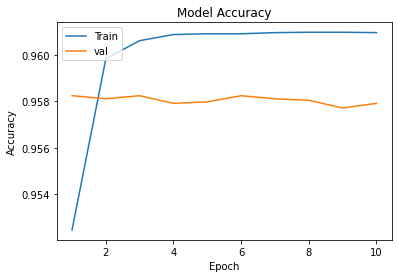

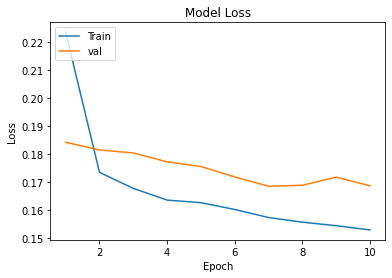

In [56]:
learning_curve(history, 10)